In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.dates as dates
import matplotlib.pyplot as plt
import datetime
import itertools
sys.path.append("C:/dev/pyktrader3/")
from pycmqlib3.utility import misc
from bktest import backtest
import pycmqlib3.analytics.data_handler as dh

In [2]:
ferrous_products_mkts = ['rb', 'hc', 'i', 'j', 'jm']
ferrous_mixed_mkts = ['ru', 'FG', 'ZC', 'SM', "SF"]
base_metal_mkts = ['cu', 'al', 'zn', 'pb', 'ni', 'sn']
precious_metal_mkts = ['au', 'ag']
ind_metal_mkts = ferrous_products_mkts + ferrous_mixed_mkts + base_metal_mkts  
petro_chem_mkts = ['l', 'pp', 'v', 'TA', 'MA', 'bu', 'sc'] #, 'fu', 'eg']
ind_all_mkts = ind_metal_mkts + petro_chem_mkts
ags_oil_mkts = ['m', 'RM', 'y', 'p', 'OI', 'a', 'c', 'cs'] #, 'b']
ags_soft_mkts = ['CF', 'CY', 'SR', 'jd', 'AP'] #, 'sp', 'CJ', 'UR']
ags_all_mkts = ags_oil_mkts + ags_soft_mkts
eq_fut_mkts = ['IF', 'IH', 'IC']
bond_fut_mkts = ['T', 'TF']
fin_all_mkts = eq_fut_mkts + bond_fut_mkts
commod_all_mkts = ind_all_mkts + ags_all_mkts + precious_metal_mkts
all_markets = commod_all_mkts + fin_all_mkts
daily_start_dict = { 'c': datetime.date(2011,1,1), 'm': datetime.date(2011,1,1),
    'y': datetime.date(2011,1,1), 'l': datetime.date(2011,1,1), 'rb':datetime.date(2011,1,1),
    'p': datetime.date(2011,1,1), 'cu':datetime.date(2011,1,1), 'al':datetime.date(2011,1,1),
    'zn':datetime.date(2011,1,1), 'au':datetime.date(2011,1,1), 'v': datetime.date(2011,1,1),
    'a': datetime.date(2011,1,1), 'ru':datetime.date(2011,1,1), 'ag':datetime.date(2012,6,1),
    'i': datetime.date(2014,1,1), 'j': datetime.date(2012,1,1), 'jm':datetime.date(2013,7,1),
    'CF':datetime.date(2012,5,1),  'TA':datetime.date(2012,4,15),
    'PM':datetime.date(2013,10,1), 'RM':datetime.date(2013,1,1),  'SR':datetime.date(2013,1,1),
    'FG':datetime.date(2013,1,1),  'OI':datetime.date(2013,5,1),  'RI':datetime.date(2013,1,1),
    'WH':datetime.date(2014,5,1),  'pp':datetime.date(2014,5,1),
    'IF':datetime.date(2010,5,1),  'MA':datetime.date(2012,1,1),  'TF':datetime.date(2014,6,1),
    'IH':datetime.date(2015,5,1),  'IC':datetime.date(2015,5,1),  'cs':datetime.date(2015,2,1),
    'jd':datetime.date(2014,5,1),  'ni':datetime.date(2015,5,1),  'sn':datetime.date(2016,5,1),
    'ZC':datetime.date(2013,11,1), 'hc':datetime.date(2014, 5, 1), 'SM': datetime.date(2017,1,1),
    'SF': datetime.date(2017,9,1), 'CY': datetime.date(2017, 9, 1), 'AP': datetime.date(2018, 1, 1),
    'TS': datetime.date(2018, 9, 1), 'fu': datetime.date(2018, 9, 1), 'sc': datetime.date(2018, 8, 1),
    'b': datetime.date(2018, 1, 1), 'pb': datetime.date(2011, 10, 1), 'bu': datetime.date(2015,9,15),
    'T':datetime.date(2015,6,1), 'ss': datetime.date(2020, 5, 1), 'sp': datetime.date(2019, 5, 1),
    'CJ': datetime.date(2019, 8, 9), 'UR': datetime.date(2019, 8, 9), 'SA': datetime.date(2020, 1, 1),
    'eb': datetime.date(2020, 1, 1), 'eg': datetime.date(2019, 5, 1), 'rr': datetime.date(2019, 9, 1),
    'pg': datetime.date(2020, 9, 1), 'lu': datetime.date(2020, 8, 1),}
min_start_dict = { 'c': datetime.date(2011,1,1), 'm': datetime.date(2011,1,1),
    'y': datetime.date(2011,1,1), 'l': datetime.date(2011,1,1), 'rb':datetime.date(2011,1,1),
    'p': datetime.date(2011,1,1), 'cu':datetime.date(2011,1,1), 'al':datetime.date(2011,1,1),
    'zn':datetime.date(2011,1,1), 'au':datetime.date(2011,1,1), 'v': datetime.date(2011,1,1),
    'a': datetime.date(2011,1,1), 'ru':datetime.date(2011,1,1), 'ag':datetime.date(2012,6,1),
    'i': datetime.date(2014,1,1), 'j': datetime.date(2012,1,1), 'jm':datetime.date(2013,7,1),
    'CF':datetime.date(2012,5,1),  'TA':datetime.date(2012,4,15),
    'PM':datetime.date(2013,10,1), 'RM':datetime.date(2013,1,1),  'SR':datetime.date(2013,1,1),
    'FG':datetime.date(2013,1,1),  'OI':datetime.date(2013,5,1),  'RI':datetime.date(2013,1,1),
    'WH':datetime.date(2014,5,1),  'pp':datetime.date(2014,5,1),
    'IF':datetime.date(2010,5,1),  'MA':datetime.date(2012,1,1),  'TF':datetime.date(2014,6,1),
    'IH':datetime.date(2015,5,1),  'IC':datetime.date(2015,5,1),  'cs':datetime.date(2015,2,1),
    'jd':datetime.date(2014,5,1),  'ni':datetime.date(2015,5,1),  'sn':datetime.date(2016,5,1),
    'ZC':datetime.date(2013,11,1), 'hc':datetime.date(2014, 5, 1), 'SM': datetime.date(2017,1,1),
    'SF': datetime.date(2017,9,1), 'CY': datetime.date(2017, 9, 1), 'AP': datetime.date(2018, 1, 1),
    'TS': datetime.date(2018, 9, 1), 'fu': datetime.date(2018, 9, 1), 'sc': datetime.date(2018, 8, 1),
    'b': datetime.date(2018, 1, 1), 'pb': datetime.date(2011, 10, 1), 'bu': datetime.date(2015,9,15),
    'T':datetime.date(2015,6,1), 'ss': datetime.date(2020, 5, 1), 'sp': datetime.date(2019, 5, 1),
    'CJ': datetime.date(2019, 8, 9), 'UR': datetime.date(2019, 8, 9), 'SA': datetime.date(2020, 1, 1),
    'eb': datetime.date(2020, 1, 1), 'eg': datetime.date(2019, 5, 1), 'rr': datetime.date(2019, 9, 1),
    'pg': datetime.date(2020, 9, 1), 'lu': datetime.date(2020, 8, 1),}

In [3]:
field_list = ['open', 'high', 'low', 'close', 'volume', 'openInterest', 'contract', 'shift']

start_date = datetime.date(2011, 1, 1)
end_date = datetime.date(2021, 4, 8)
pnl_tenors = ['1y', '2y', '3y', '4y', '5y', '6y', '8y', '10y']

sim_products = commod_all_mkts
need_shift = 1
freq = 'd'

if freq == 'd':
    sim_start_dict = daily_start_dict
else:
    sim_start_dict = min_start_dict
    
delim = '-'
dbtbl_prefix = ''
args = {'n': 1, 'roll_rule': '-30b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
ferrous_products_args = args
ferro_mixed_mkt_args = args
base_args = {'n': 1, 'roll_rule': '-30b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
sc_args = {'n': 1, 'roll_rule': '-20b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
eq_args = {'n': 1, 'roll_rule': '-1b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
bond_args = {'n': 1, 'roll_rule': '-30b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
precious_args = {'n': 1, 'roll_rule': '-25b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}

df_list = []
for idx, asset in enumerate(sim_products):
    use_args = args
    if asset in eq_fut_mkts:
        use_args = eq_args
    elif asset in ['cu', 'al', 'zn', 'pb', 'sn']:
        use_args = base_args
    elif asset in ['sc']:
        use_args = sc_args  
    elif asset in bond_fut_mkts:
        use_args = bond_args
    elif asset in precious_metal_mkts:
        use_args = precious_args
    use_args['start_date'] = max(sim_start_dict[asset], start_date)
    use_args['end_date'] = end_date
    print("loading mkt = %s, args = %s" % (asset, use_args))
    df = misc.nearby(asset, **use_args)
    if freq == 'm':
        df = misc.cleanup_mindata(df, asset)
    if (idx == 0) and (freq == 'm'):
        df_list.append(df[['date', 'min_id']])
    xdf = df[field_list]
    xdf.columns = [delim.join((asset, col)) for col in xdf.columns]
    df_list.append(xdf)

df = pd.concat(df_list, axis = 1, sort = False).sort_index()
print(df.tail(20))

loading mkt = rb, args = {'n': 1, 'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2011, 1, 1), 'end_date': datetime.date(2021, 4, 8)}
loading mkt = hc, args = {'n': 1, 'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2014, 5, 1), 'end_date': datetime.date(2021, 4, 8)}
loading mkt = i, args = {'n': 1, 'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2014, 1, 1), 'end_date': datetime.date(2021, 4, 8)}
loading mkt = j, args = {'n': 1, 'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2012, 1, 1), 'end_date': datetime.date(2021, 4, 8)}
loading mkt = jm, args = {'n': 1, 'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2013, 7, 1), 'end_date': datetime.date(2021, 4, 8)}
loading mkt = ru, args = {'n': 1, 'roll_rule': '-30b', 'freq': 'd', 'need_shi

In [4]:
def run_xs_test(input_args):
    product_list = input_args['product_list']
    mom_win = input_args['win']
    ma_win = input_args['ma_win']
    vol_win = input_args['std_win']
    pos_std = input_args['pos_std']
    rebal_freq = input_args['rebal_freq']
    cost_ratio = input_args.get('cost_ratio', 0.5)
    quantile_cutoff = input_args.get('quantile', 0.2)
    run_mode = input_args.get('run_mode', "momma")
    params = input_args.get('params', [0.2])
    prefix = input_args.get('prefix', "")
    run_name = input_args.get('run_name', 'test')
    start_date = input_args.get('start_date', None)
    end_date = input_args.get('end_date', None)
    select_cols = []
    rank_field = ""
    for col in df.columns:
        col_split = col.split(delim)
        if col_split[0] in product_list:
            select_cols.append(col)
    xdf= df[select_cols].sort_index().fillna(method='ffill').copy()
    if start_date:
        xdf = xdf[xdf.index>= start_date]
    if end_date:
        xdf = xdf[xdf.index<= end_date]
        
    for asset in product_list:
        if need_shift == 1:
            xdf[delim.join((asset, 'lr'))] = np.log(xdf[delim.join((asset, 'close'))] -xdf[delim.join((asset, 'shift'))])- np.log(xdf[delim.join((asset, 'close'))].shift(1) -xdf[delim.join((asset, 'shift'))])
        else:
            xdf[delim.join((asset, 'lr'))] = \
                np.log(xdf[delim.join((asset, 'close'))])- np.log(xdf[delim.join((asset, 'close'))].shift(1))
        if run_mode == 'mom':
            xdf[delim.join((asset, 'mom'))] =  xdf[delim.join((asset, 'lr'))].rolling(mom_win).sum()
            rank_field = "mom"
        if run_mode == 'momma':
            xdf[delim.join((asset, 'momma'))] =  xdf[delim.join((asset, 'lr'))].rolling(mom_win).sum().rolling(ma_win).mean()
            rank_field = "momma"
        elif run_mode == 'rsima':
            rsi_output = dh.RSI_F(xdf, mom_win, prefix = asset + delim)
            xdf[delim.join((asset, 'rsi'))] = rsi_output[asset + delim + 'RSI' + str(mom_win)]
            xdf[delim.join((asset, 'rsima'))] = dh.EMA(xdf, ma_win, field = 'rsi', prefix = asset + delim)
            rank_field = "rsima"
        elif run_mode == 'madist':
            xdf[delim.join((asset, 'ema1'))] = dh.EMA(xdf, mom_win, field = 'close', prefix = asset + delim)
            xdf[delim.join((asset, 'ema2'))] = dh.EMA(xdf, int(mom_win * params[0]), field = 'close', prefix = asset + delim)
            xdf[delim.join((asset, 'std'))] = dh.STDEV(xdf, ma_win, field = 'close', prefix = asset + delim)
            xdf[delim.join((asset, 'madist'))] = (xdf[delim.join((asset, 'ema1'))] - xdf[delim.join((asset, 'ema2'))])/xdf[delim.join((asset, 'std'))]
            xdf[delim.join((asset, 'nmadist'))] = xdf[delim.join((asset, 'madist'))]/dh.STDEV(xdf, int(ma_win * params[1]), field = 'madist', prefix = asset + delim)
            xdf[delim.join((asset, 'sig'))] = xdf[delim.join((asset, 'nmadist'))].apply(lambda x: dh.response_curve(x, "absorbing", param = 2.0))
            rank_field = "sig"
        if need_shift == 1:        
            orig_close = xdf[delim.join((asset, 'close'))] -xdf[delim.join((asset, 'shift'))]
            if pos_std == 1:
                xdf[delim.join((asset, 'std'))] = dh.ATR(df, vol_win, prefix = asset + delim).fillna(method='bfill') * 10.0
            else:
                xdf[delim.join((asset, 'std'))] = orig_close
        elif need_shift == 2:
            orig_close = xdf[delim.join((asset, 'close'))] * np.exp(-xdf[delim.join((asset, 'shift'))])
            if pos_std == 1:
                xdf[delim.join((asset, 'std'))] = (np.log(xdf[delim.join((asset, 'close'))]) \
                                - np.log(xdf[delim.join((asset, 'close'))].shift(1))).rolling(vol_win).std() \
                                * orig_close * 10
            else:
                xdf[delim.join((asset, 'std'))] = orig_close
        else:
            orig_close = xdf[delim.join((asset, 'close'))]
            xdf[delim.join((asset, 'std'))] = orig_close
        
    total_risk = 5000000.0
    margin_rate = [0.08, 0.08]
    offset_list = [ backtest.trade_offset_dict.get(asset, 0.0) for asset in product_list]
    offset_list = [ offset * cost_ratio for offset in offset_list]
    start_capital = 0.0

    xdf['rebal_seqno'] = range(len(xdf.index))

    rank_df = xdf[[delim.join((asset, rank_field)) for asset in product_list]].rank(axis=1)
    rank_df.columns = product_list
    
    xdf['prod_count'] = rank_df.apply(lambda x: x.count() if x.count() > 0 else np.nan, axis=1).fillna(0)
    xdf['kcut'] = (xdf['prod_count'] * quantile_cutoff).astype('int')
    xdf['upper_rank'] = xdf['prod_count'] - xdf['kcut']
    xdf['lower_rank'] = xdf['kcut'] + 1 
    
    long_pos = pd.DataFrame(0, columns = product_list, index = xdf.index)
    short_pos = pd.DataFrame(0, columns = product_list, index = xdf.index)

    for rebal_idx in range(rebal_freq):
        long_tmp = pd.DataFrame(columns=product_list, index = xdf.index)
        short_tmp = pd.DataFrame(columns=product_list, index = xdf.index)
        rebal_flag = xdf['rebal_seqno'].apply(lambda x: (x % rebal_freq) == rebal_idx)
        for asset in product_list:
            long_tmp.loc[(rank_df[asset]>xdf['upper_rank']) & rebal_flag, asset] = 1.0
            long_tmp.loc[(rank_df[asset]<=xdf['upper_rank']) & rebal_flag, asset] = 0.0
            short_tmp.loc[(rank_df[asset]<xdf['lower_rank']) & rebal_flag, asset] = 1.0
            short_tmp.loc[(rank_df[asset]>=xdf['lower_rank']) & rebal_flag, asset] = 0.0
        long_tmp = long_tmp.fillna(method='ffill').fillna(0)
        short_tmp = short_tmp.fillna(method='ffill').fillna(0)
        long_sum = long_tmp.sum(axis=1)
        short_sum = short_tmp.sum(axis=1)
        long_pos = long_pos + long_tmp.div(long_sum,axis=0)
        short_pos = short_pos + short_tmp.div(short_sum,axis=0)
    extract_fields = ['open', 'close', 'traded_price', 'contract', 'cost', 'pos']
    df_list = []

    for asset, offset in zip(product_list, offset_list):
        long_pos[asset] = (long_pos[asset] * total_risk / rebal_freq \
                    /xdf[delim.join((asset,'std'))].astype('float')).shift(1).fillna(method='ffill') 
        short_pos[asset] = (short_pos[asset] * total_risk / rebal_freq \
                    /xdf[delim.join((asset,'std'))].astype('float')).shift(1).fillna(method='ffill')
        xdf[delim.join((asset, 'pos'))] = long_pos[asset].fillna(0.0) - short_pos[asset].fillna(0.0)
        xdf[delim.join((asset, 'traded_price'))] = xdf[delim.join((asset, 'open'))]
        xdf[delim.join((asset, 'pos'))].iloc[-1] = 0
        xdf[delim.join((asset, 'cost'))] = \
                abs(xdf[delim.join((asset, 'pos'))] \
                - xdf[delim.join((asset, 'pos'))].shift(1)) * offset
        xdf[delim.join((asset, 'cost'))] = xdf[delim.join((asset, 'cost'))].fillna(0.0)
        fields = [delim.join((asset, field)) for field in extract_fields] 
        tdf = xdf[fields]
        tdf.columns = extract_fields
        tdf.index.name = 'date'    
        if freq == 'm':
            tdf['date'] = xdf['date']
            tdf['min_id'] = xdf['min_id']
        #closed_trades = backtest.simdf_to_trades1(tdf, slippage = offset)
        df_list.append(tdf)
    (res_pnl, ts) = backtest.get_pnl_stats(df_list, margin_rate, freq, tenors = pnl_tenors, start_capital = start_capital, cost_ratio = cost_ratio)
    pos_df = xdf[[delim.join((asset, 'pos')) for asset in product_list]]
    cum_pnl = ts['cum_pnl']
    cum_pnl.name = run_name
    pnl_df = pd.DataFrame.from_dict(res_pnl, orient='index').sort_index()
    pnl_df.columns = [run_name]
    res = {'cum_pnl': ts['cum_pnl'], 'name': run_name, 'pnl_stats': pnl_df, 'pos_df': pos_df}
    return res

<ipython-input-5-cfe8946aca91>:48: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  port_pnl = pd.Series()
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


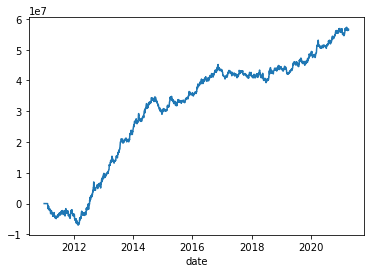

                 mom-commod_mkts-20-1-5
sharp_ratio_10y                1.326228
sharp_ratio_1y                 1.352143
sharp_ratio_2y                 1.709935
sharp_ratio_3y                 1.142525
sharp_ratio_4y                 0.820364
sharp_ratio_5y                 0.842784
sharp_ratio_6y                 0.909855
sharp_ratio_8y                 1.276901
std_pnl_10y               291083.767230
std_pnl_1y                253505.199824
std_pnl_2y                268354.889698
std_pnl_3y                271111.540491
std_pnl_4y                263259.992336
std_pnl_5y                267310.703098
std_pnl_6y                265965.290900
std_pnl_8y                275171.317078


C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


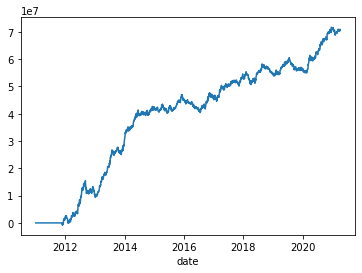

                 mom-commod_mkts-210-1-5
sharp_ratio_10y                 1.521123
sharp_ratio_1y                  2.384446
sharp_ratio_2y                  1.604676
sharp_ratio_3y                  1.413286
sharp_ratio_4y                  1.139551
sharp_ratio_5y                  1.155983
sharp_ratio_6y                  1.036847
sharp_ratio_8y                  1.462563
std_pnl_10y                303770.459515
std_pnl_1y                 308320.348989
std_pnl_2y                 300962.891662
std_pnl_3y                 294571.893248
std_pnl_4y                 291936.752547
std_pnl_5y                 302194.058154
std_pnl_6y                 295603.277235
std_pnl_8y                 304567.075938


C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


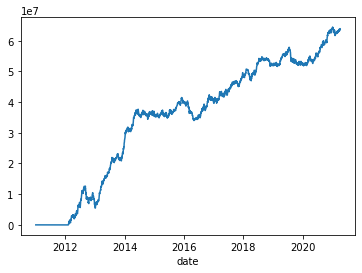

                 momma-commod_mkts-140-120-5
sharp_ratio_10y                     1.400746
sharp_ratio_1y                      2.245141
sharp_ratio_2y                      1.168327
sharp_ratio_3y                      1.220078
sharp_ratio_4y                      1.167325
sharp_ratio_5y                      1.225880
sharp_ratio_6y                      1.001277
sharp_ratio_8y                      1.359739
std_pnl_10y                    297401.764196
std_pnl_1y                     295610.235558
std_pnl_2y                     293026.610596
std_pnl_3y                     283238.256672
std_pnl_4y                     284011.660857
std_pnl_5y                     291998.288958
std_pnl_6y                     294085.153270
std_pnl_8y                     301518.135378


C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


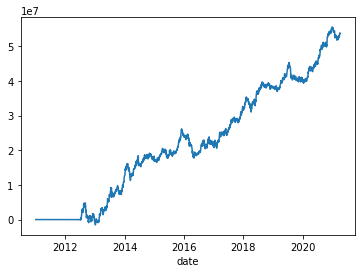

                 momma-commod_mkts-240-120-5
sharp_ratio_10y                     1.148900
sharp_ratio_1y                      2.308057
sharp_ratio_2y                      1.543849
sharp_ratio_3y                      1.479707
sharp_ratio_4y                      1.520441
sharp_ratio_5y                      1.370785
sharp_ratio_6y                      1.185797
sharp_ratio_8y                      1.295905
std_pnl_10y                    304682.276245
std_pnl_1y                     302461.592377
std_pnl_2y                     306562.415932
std_pnl_3y                     307975.741559
std_pnl_4y                     304975.781754
std_pnl_5y                     312233.616516
std_pnl_6y                     311756.624844
std_pnl_8y                     319623.562443


C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


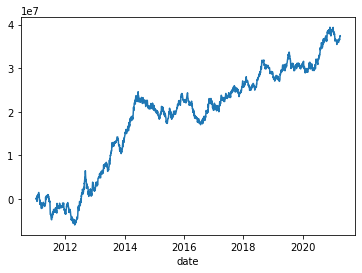

                 rsima-commod_mkts-70-60-5
sharp_ratio_10y                   0.809177
sharp_ratio_1y                    1.620931
sharp_ratio_2y                    0.961937
sharp_ratio_3y                    0.928195
sharp_ratio_4y                    0.805436
sharp_ratio_5y                    0.700644
sharp_ratio_6y                    0.632013
sharp_ratio_8y                    0.838990
std_pnl_10y                  308307.206332
std_pnl_1y                   300554.761659
std_pnl_2y                   297657.610861
std_pnl_3y                   282677.180873
std_pnl_4y                   277486.369503
std_pnl_5y                   289070.757631
std_pnl_6y                   288204.524909
std_pnl_8y                   301308.061754


C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


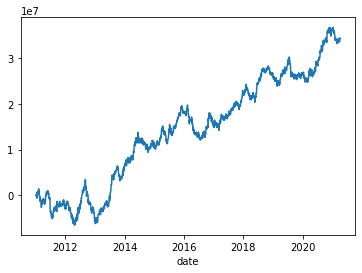

                 rsima-commod_mkts-100-80-5
sharp_ratio_10y                    0.747108
sharp_ratio_1y                     1.739688
sharp_ratio_2y                     0.953070
sharp_ratio_3y                     0.985155
sharp_ratio_4y                     0.968838
sharp_ratio_5y                     0.805698
sharp_ratio_6y                     0.746328
sharp_ratio_8y                     1.016904
std_pnl_10y                   305846.074184
std_pnl_1y                    305310.919708
std_pnl_2y                    300663.318474
std_pnl_3y                    286372.271274
std_pnl_4y                    279185.296377
std_pnl_5y                    287769.601939
std_pnl_6y                    292406.813532
std_pnl_8y                    299424.654667


C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


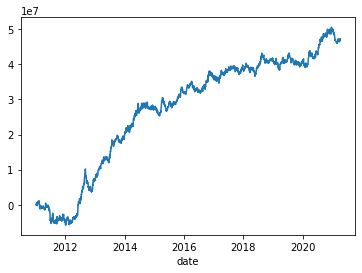

                 rsima-commod_mkts-90-10-5
sharp_ratio_10y                   0.994963
sharp_ratio_1y                    0.966430
sharp_ratio_2y                    0.746523
sharp_ratio_3y                    0.607825
sharp_ratio_4y                    0.502339
sharp_ratio_5y                    0.537050
sharp_ratio_6y                    0.661671
sharp_ratio_8y                    0.936994
std_pnl_10y                  310368.880937
std_pnl_1y                   317891.189655
std_pnl_2y                   304092.755414
std_pnl_3y                   291894.060761
std_pnl_4y                   285170.134611
std_pnl_5y                   294537.995135
std_pnl_6y                   290729.856272
std_pnl_8y                   301254.938479


C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


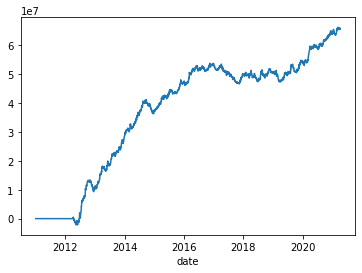

                 madist-commod_mkts-8-100-5
sharp_ratio_10y                    1.598550
sharp_ratio_1y                     1.801200
sharp_ratio_2y                     2.193617
sharp_ratio_3y                     1.235669
sharp_ratio_4y                     0.748494
sharp_ratio_5y                     0.746597
sharp_ratio_6y                     0.998164
sharp_ratio_8y                     1.433792
std_pnl_10y                   267681.017706
std_pnl_1y                    246399.954166
std_pnl_2y                    268908.812541
std_pnl_3y                    271018.990135
std_pnl_4y                    263628.189719
std_pnl_5y                    260061.089534
std_pnl_6y                    263133.304602
std_pnl_8y                    271383.167635


C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


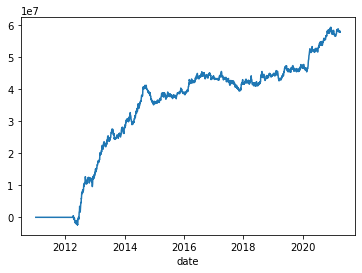

                 madist-commod_mkts-16-100-5
sharp_ratio_10y                     1.316744
sharp_ratio_1y                      1.417369
sharp_ratio_2y                      1.734949
sharp_ratio_3y                      1.176465
sharp_ratio_4y                      0.723943
sharp_ratio_5y                      0.720111
sharp_ratio_6y                      0.770672
sharp_ratio_8y                      1.022738
std_pnl_10y                    286367.410468
std_pnl_1y                     281749.769607
std_pnl_2y                     276234.023709
std_pnl_3y                     279903.147650
std_pnl_4y                     275521.788136
std_pnl_5y                     273222.171177
std_pnl_6y                     273059.711716
std_pnl_8y                     286125.569411


C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


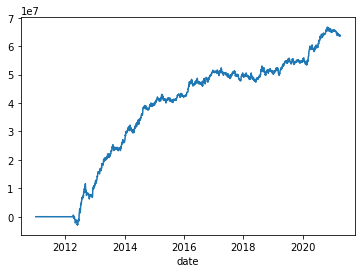

                 madist-commod_mkts-32-100-5
sharp_ratio_10y                     1.466620
sharp_ratio_1y                      1.077851
sharp_ratio_2y                      1.437551
sharp_ratio_3y                      1.118816
sharp_ratio_4y                      0.695374
sharp_ratio_5y                      0.763230
sharp_ratio_6y                      0.846699
sharp_ratio_8y                      1.298572
std_pnl_10y                    283032.619889
std_pnl_1y                     276399.166899
std_pnl_2y                     272545.859469
std_pnl_3y                     273230.463913
std_pnl_4y                     268763.153207
std_pnl_5y                     271465.478429
std_pnl_6y                     269888.680404
std_pnl_8y                     283552.295830


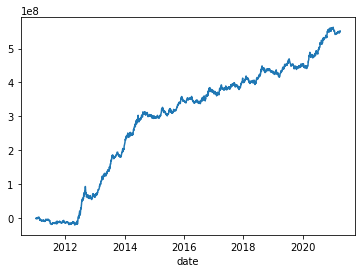

date
2021-02-25    5.445070e+08
2021-02-26    5.434468e+08
2021-03-01    5.443904e+08
2021-03-02    5.454042e+08
2021-03-03    5.465325e+08
2021-03-04    5.461663e+08
2021-03-05    5.461922e+08
2021-03-08    5.458912e+08
2021-03-09    5.480634e+08
2021-03-10    5.468748e+08
2021-03-11    5.480094e+08
2021-03-12    5.481856e+08
2021-03-15    5.481035e+08
2021-03-16    5.504269e+08
2021-03-17    5.479244e+08
2021-03-18    5.482256e+08
2021-03-19    5.464232e+08
2021-03-22    5.471183e+08
2021-03-23    5.470478e+08
2021-03-24    5.483289e+08
2021-03-25    5.487538e+08
2021-03-26    5.493504e+08
2021-03-29    5.462603e+08
2021-03-30    5.481541e+08
2021-03-31    5.469028e+08
2021-04-01    5.476803e+08
2021-04-02    5.491353e+08
2021-04-06    5.518242e+08
2021-04-07    5.522362e+08
2021-04-08    5.503607e+08
Name: daily_pnl, dtype: float64
                            0
sharp_ratio_10y  1.645067e+00
sharp_ratio_1y   2.090405e+00
sharp_ratio_2y   1.777395e+00
sharp_ratio_3y   1.472902e+00
sha

In [5]:
res = {}
stats_list = []
cum_list = []
sratio_years = [int(ten[:-1]) for ten in pnl_tenors]

mixed_metal_mkts = ['rb', 'hc', 'i', 'j', 'jm', 'ru', 'FG', 'ZC', 'cu', 'al', 'zn', 'ni']
commod_mkts = ['rb', 'hc', 'i', 'j', 'jm', 'ru', 'FG', 'ZC', 'cu', 'al', 'zn', 'pb', 'ni', 'sn', \
               'l', 'pp', 'v', 'TA', 'MA', 'bu', 'sc', 'm', 'RM', 'y', 'p', 'OI', 'a', 'c', 'cs', 'CF', 'SR', 'jd'] 

product_list =  commod_mkts 
#commod_mkts #ind_all_mkts + ags_all_mkts # ind_metal_mkts # commod_all_mkts #  ferrous_products_mkts # 
product_name = 'commod_mkts'
run_mode = 'madist'
start_date = datetime.date(2011,1,1)
end_date = datetime.date(2021,4,8)
cost_ratio = 0.5
pos_std = 1
std_win = 20
ma_win = 120
rebal = 5
quantile = 0.2
#save_loc = "C:\\dev\\data\\selected_xsmom_%s_" % ('_'.join([run_mode, product_name, str(quantile), str(end_date)]))
save_loc = "C:\\dev\\data\\combined_xsmom_%s_" % ('_'.join([product_name, str(quantile), str(end_date)]))

index_list = range(8, 88, 8) #range(10, 110, 10) #range(10, 250, 10) #  
column_list = [60, 80, 100, 120, 140, 160] #range(10, 90, 10) #range(10, 130, 10) #[1, 3, 5, 10, 15, 20] #[i * 0.01 for i in range(0, 32, 4)] # 
sratio = {}
run_sratio = False
run_pos_sum = True

pos_sum = pd.DataFrame()
pos_list = []
#scenarios = list(itertools.product(index_list, column_list))
#mixed_metal_mkts
#scenarios = [('mom', 1.0, 130, 1, 5, [0.0]), ('mom', 1.0, 230, 1, 5, [0.0]),\
#             ('rsima', 1.0, 60, 80, 5, [0.0]), ('rsima', 1.0, 10, 80, 5, [0.0]), ('rsima', 1.0, 40, 20, 5, [0.0]),\
#             ('madist', 1.0, 16, 100, 5, [1.5, 2.0]), ('madist', 1.0, 40, 100, 5, [1.5, 2.0]), ('madist', 1.0, 56, 140, 5, [1.5, 2.0])]
#commod_all_mkts
scenarios = [('mom', 1.0, 20, 1, 5, [0.0]), ('mom', 1.0, 210, 1, 5, [0.0]), #('mom', 1.0, 160, 1, 5, [0.0]),
             ('momma', 1.0, 140, 120, 5, [0.0]), ('momma', 1.0, 240, 120, 5, [0.0]), \
             ('rsima', 1.0, 70, 60, 5, [0.0]), ('rsima', 1.0, 100, 80, 5, [0.0]), ('rsima', 1.0, 90, 10, 5, [0.0]), \
             ('madist', 1.0, 8, 100, 5, [1.5, 2.0]), ('madist', 1.0, 16, 100, 5, [1.5, 2.0]), ('madist', 1.0, 32, 100, 5, [1.5, 2.0]), #('madist', 64, 100, 5, [1.5, 2.0]), 
            ]
if run_sratio:
    for yr in sratio_years:
        sratio[yr] = pd.DataFrame(0, index = index_list, columns = column_list)

port_pnl = pd.Series()
weight = 1.0        
        
for scen in scenarios: 
    if len(scen) == 2:
        scen_x = scen[0]
        scen_y = scen[1]
        if run_mode in ['mom']:
            win = scen_x
            ma_win = 1
            rebal = scen_y
            params = [0.0]
        elif run_mode in ['momma', 'rsima', 'madist']:
            win = scen_x
            ma_win = scen_y
            rebal = 5
            params = [1.5, 2.0]
        else:
            print("unsupported run_mode")
            continue
    elif len(scen) >= 6:
        run_mode = scen[0]
        weight = scen[1]
        win = scen[2]
        ma_win = scen[3]
        rebal = scen[4]
        params = scen[5]
    else:
        print("unsupported scenarios")
        continue
    run_args = {}
    run_args['start_date'] = start_date
    run_args['end_date'] = end_date
    run_args['cost_ratio'] = cost_ratio
    run_args['product_list'] = product_list
    run_args['run_name'] = run_name = '-'.join([run_mode, product_name, str(win), str(ma_win), str(rebal)])  
    run_args['win'] = win
    run_args['ma_win'] = ma_win
    run_args['std_win'] = std_win
    run_args['prefix'] = save_loc        
    run_args['rebal_freq'] = rebal
    run_args['pos_std'] = pos_std
    run_args['params'] = params
    run_args['quantile'] = quantile
    run_args['run_mode'] = run_mode
    res = run_xs_test(run_args)
    res['cum_pnl'].plot()
    plt.show()
    cum_list.append(res['cum_pnl'])
    stats_list.append(res['pnl_stats'])
    vdf = res['pnl_stats']
    vdf = vdf.loc[[idx for idx in vdf.index if ('sharp' in idx) or ('std' in idx)], :]
    print(vdf)
    if run_pos_sum:
        pos_list.append(res['pos_df'])
        pos_sum = pos_sum.add(res['pos_df'] * weight, fill_value = 0)  
        port_pnl = port_pnl.add(res['cum_pnl'] * weight, fill_value = 0)
    if run_sratio:
        for yr in sratio_years:
            lbl = 'sharp_ratio_' + str(yr) + 'y'
            sratio[yr][scen_y].loc[scen_x] = res['pnl_stats'][run_name][lbl]
        
port_pnl.plot()
port_pnl.name = 'daily_pnl'
plt.show()
res_pnl = backtest.pnl_stats_by_tenor(port_pnl.diff().dropna(), tenors = pnl_tenors, field = None)
vdf = pd.DataFrame.from_dict(res_pnl, orient='index').sort_index()
vdf = vdf.loc[[idx for idx in vdf.index if ('sharp' in idx) or ('std' in idx)], :]
print(port_pnl[-30:])
print(vdf)

cum_df = pd.concat(cum_list, axis = 1)
cum_df.to_csv(save_loc + 'pnl.csv')
stats_df = pd.concat(stats_list, axis = 1)
stats_df.T.to_csv(save_loc + 'stats.csv')
if run_pos_sum:
    print(pos_sum)
if run_sratio:
    for yr in sratio_years:
        print(sratio[yr])


In [7]:
save_xl = True
if run_pos_sum and save_xl:
    xlfile = save_loc + "pos_data.xlsx"
    writer = pd.ExcelWriter(xlfile)
    for idx in range(len(pos_list)):            
        pos_list[idx].to_excel(writer, str(idx), startcol= 0, startrow=1)
    pos_sum.to_excel(writer, "sum", startcol= 0, startrow=1)
    writer.save()    
if run_sratio and save_xl:
    xlfile = save_loc + "sratio_heatmap.xlsx"
    writer = pd.ExcelWriter(xlfile)
    for yr in sratio_years:
        lbl = 'sharp_ratio_' + str(yr) + 'y'
        sratio[yr].to_excel(writer, lbl, startcol= 0, startrow=1)
    writer.save()    